In [1]:
# This cell is to import needed libraries/packages and datasets. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Datasets have been cleaned in previous notebooks.

#df_whole is a copy of the original Data frame, with large amounts of cleaning and parsing to allow for plotting.
df_whole = pd.read_csv("df_whole.csv")
#df_lang is a dataframe modified from df_whole, the answer to the languages used question have been exploaded out to get counts per mention.
df_lang = pd.read_csv("df_lang.csv")
#df_whole_45 is a subset of the original data frame that only includes the top 45 countries by participation.
df_whole_45 = pd.read_csv('df_whole_45.csv')
#df_45 is a new data frame created from df_whole_45 that has means, medians and participation counts for categories grouped by country.
df_45 = pd.read_csv("df_45_clean.csv")

df_salary_test = pd.read_csv('df_salary_test.csv')

#df is the original df.
df = pd.read_csv('data/survey_results_public.csv')

In [ ]:
#df['CompTotal'].value_counts()
#string_rows = df.loc[df['CompTotal'].apply(lambda x: isinstance(x, str))]
#string_rows
filtered_rows = df[df['CompTotal'] < 5000]
grouped_data = filtered_rows.groupby('Country')
grouped_data.size().sort_values(ascending=False).head(45)

# I want a new df that has a list of these countries and how many people responded above $1,000,000, how many below $5,000,
    #how many participated in the study...issue is these are not converted salaries so I may need to do it with a diff dataframe. 
    
# from there I will determine a bottom percent to cut, a top percent to cut, and adjust the notes in the report about the zero 
# entries being malitouos, there is not way to opt out of this question by saying perfer not to say.
# may be benifitial to look at the number or monthly,weekly, yearly values in the to 10% of several countrie in a df. 
# To hypothesize if the error was in the understanding of the question.
# After I have removed these values, I will need to update all data frames and check that my annalysis has not changed. 
# This I can make the box and whisker visulization for the DF_45 DF, and move on from the salary analysis to the mental health and devops section

In [13]:
df_salary_test['YearlyTotConvertCOMP']
sorted_df = df_salary_test.sort_values('YearlyTotConvertCOMP')
sorted_df

zero_entries = df_salary_test[df_salary_test['YearlyTotConvertCOMP'] == 0.0]
desired_columns = ['Employment', 'EdLevel', 'Country', 'Currency', 'CompTotal', 'CompFreq', 'Age', 'Gender', 'SurveyEase', 'ConvertedCompYearly', 'CurrencyConvert', 'YearlyTotConvertCOMP']
zero_entries[desired_columns].head(45)


,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly


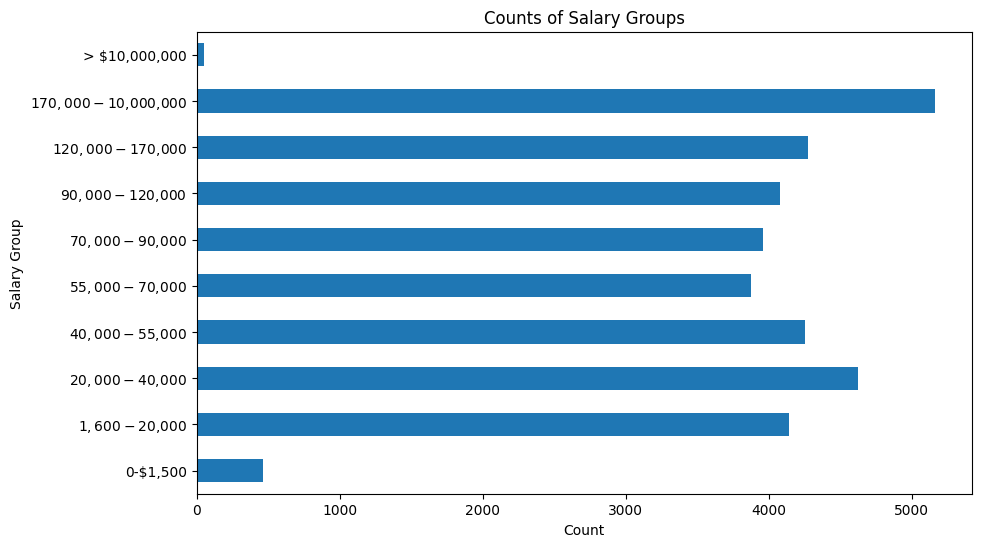

In [3]:


#'YearlyTotConvertCOMP'
#'ConvertedCompYearly'

# Define the salary groups and their corresponding labels
#salary_groups = [0, 1500, 20000, 40000, 55000, 70000, 90000, 120000, 170000, 10000000, float('inf')]

salary_groups = [0, 1500, 20000,  40000, 55000, 70000, 90000, 120000, 170000, 10000000, float('inf')]
labels = ['0-$1,500', '$1,600-$20,000', '$20,000-$40,000', '$40,000-$55,000', '$55,000-$70,000', '$70,000-$90,000', '$90,000-$120,000', '$120,000-$170,000', '$170,000-$10,000,000', '> $10,000,000']

# Populate the 'SalaryGroup' column based on salary ranges
df_salary_test['SalaryGroup'] = pd.cut(df_salary_test['YearlyTotConvertCOMP'], bins=salary_groups, labels=labels, right=False)

# Calculate the counts for each salary group
group_counts = df_salary_test['SalaryGroup'].value_counts()

# Reorder the counts based on the provided labels
group_counts = group_counts.reindex(labels)

# Create a horizontal bar chart using matplotlib
plt.figure(figsize=(10, 6))
group_counts.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Salary Group')
plt.title('Counts of Salary Groups')
plt.show()





In [48]:
# Calculate the counts for each salary group
group_counts = df_salary_test['SalaryGroup'].value_counts()

# Print the counts for each group
for label, count in zip(labels, group_counts):
    print(f'{label}: {count}')
    
    
    

0-$1,500: 5161
$1,600-$20,000: 4623
$20,000-$40,000: 4275
$40,000-$55,000: 4253
$55,000-$70,000: 4143
$70,000-$90,000: 4081
$90,000-$120,000: 3961
$120,000-$170,000: 3872
$170,000-$10,000,000: 465
> $10,000,000: 47


In [49]:
print(df_whole_45.groupby('SalaryGroup').size().sum())
print(df_whole_45['YearlyTotConvertCOMP'].count())
zero_entries = df_whole_45[df_whole_45['YearlyTotConvertCOMP'] == 0.0]

zero_entries

33561
33561


,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly,CurrencyConvert,YearlyTotConvertCOMP,SalaryGroup


In [50]:
# Slice the DataFrame to include only the 'SalaryGroup' and 'YearlyTotConvertCOMP' columns
side_by_side = df_whole_45[['SalaryGroup', 'YearlyTotConvertCOMP']]

# Display the side-by-side columns
#rint(side_by_side.tail(75))
sorted_df = side_by_side.sort_values('YearlyTotConvertCOMP')

sorted_df

,SalaryGroup,YearlyTotConvertCOMP
3677,"$1,600-$20,000",1553.398058
11619,"$1,600-$20,000",1553.398058
8991,"$1,600-$20,000",1559.251559
9969,"$1,600-$20,000",1560.000000
23822,"$1,600-$20,000",1579.394970
...,...,...
11235,"$170,000-$1,000,000",993548.387097
30463,"$170,000-$1,000,000",993548.387097
28318,"$170,000-$1,000,000",995121.951220
2323,"$170,000-$1,000,000",996000.000000


In [52]:
desired_group_entries = df_salary_test[df_salary_test['SalaryGroup'] == '> $10,000,000']
desired_columns = ['Employment', 'EdLevel', 'Country', 'Currency', 'CompTotal', 'CompFreq', 'Age', 'Gender', 'SurveyEase', 'ConvertedCompYearly', 'CurrencyConvert', 'YearlyTotConvertCOMP', 'SalaryGroup']
desired_group_entries_filtered = desired_group_entries[desired_columns]

# Print the filtered entries for the desired columns
desired_group_entries_filtered.head(45)

# Print the entries for the desired group
#print(desired_group_entries)

,Employment,EdLevel,Country,Currency,CompTotal,CompFreq,Age,Gender,SurveyEase,ConvertedCompYearly,CurrencyConvert,YearlyTotConvertCOMP,SalaryGroup
176,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Portugal,EUR,4.200004e+07,Yearly,25-34 years old,Woman,Neither easy nor difficult,44790396.0,0.93,4.516134e+07,"> $10,000,000"
1212,"Employed, full-time","Other doctoral degree (Ph.D., Ed.D., etc.)",United States of America,USD,3.000000e+05,Weekly,35-44 years old,Man,Easy,15000000.0,1.00,1.560000e+07,"> $10,000,000"
1371,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",United States of America,USD,2.200000e+05,Weekly,18-24 years old,Man,Neither easy nor difficult,11000000.0,1.00,1.144000e+07,"> $10,000,000"
1684,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,USD,2.500000e+05,Weekly,35-44 years old,Man,Neither easy nor difficult,12500000.0,1.00,1.300000e+07,"> $10,000,000"
1773,"Independent contractor, freelancer, or self-em...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,USD,1.200000e+07,Yearly,35-44 years old,Man,Easy,12000000.0,1.00,1.200000e+07,"> $10,000,000"
2724,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",United States of America,USD,2.500000e+05,Weekly,45-54 years old,Man,Easy,12500000.0,1.00,1.300000e+07,"> $10,000,000"
2748,"Employed, full-time",Some college/university study without earning ...,United States of America,USD,1.990000e+05,Weekly,35-44 years old,Man,Easy,9950000.0,1.00,1.034800e+07,"> $10,000,000"
2893,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,USD,1.000000e+52,Weekly,18-24 years old,Man,Difficult,NaN,1.00,5.200000e+53,"> $10,000,000"
3080,I prefer not to say,Something else,United States of America,USD,1.950000e+05,Weekly,35-44 years old,Man,Easy,9750000.0,1.00,1.014000e+07,"> $10,000,000"
7475,"Employed, full-time",Some college/university study without earning ...,United States of America,USD,2.800000e+05,Weekly,25-34 years old,Man,Easy,14000000.0,1.00,1.456000e+07,"> $10,000,000"


In [53]:
compfreq_counts = desired_group_entries['CompFreq'].value_counts()

# Print the value counts for the 'CompFreq' column
print(compfreq_counts)

Weekly     39
Yearly      5
Monthly     3
Name: CompFreq, dtype: int64


In [54]:
desired_group_entries_yearly = desired_group_entries[desired_group_entries['CompFreq'] == 'Yearly']

# Print the entries with 'CompFreq' as 'Yearly'
desired_group_entries_yearly[desired_columns]

,Employment,EdLevel,Country,Currency,CompTotal,CompFreq,Age,Gender,SurveyEase,ConvertedCompYearly,CurrencyConvert,YearlyTotConvertCOMP,SalaryGroup
176,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Portugal,EUR,42000044.0,Yearly,25-34 years old,Woman,Neither easy nor difficult,44790396.0,0.93,4.516134e+07,"> $10,000,000"
1773,"Independent contractor, freelancer, or self-em...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,USD,12000000.0,Yearly,35-44 years old,Man,Easy,12000000.0,1.00,1.200000e+07,"> $10,000,000"
16223,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Australia,AUD,200000000.0,Yearly,55-64 years old,"Non-binary, genderqueer, or gender non-conforming",Easy,NaN,1.50,1.333333e+08,"> $10,000,000"
39536,"Employed, full-time",Some college/university study without earning ...,United States of America,USD,150800000.0,Yearly,35-44 years old,Man,Easy,NaN,1.00,1.508000e+08,"> $10,000,000"
54555,"Employed, full-time;Independent contractor, fr...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",United States of America,USD,190560000.0,Yearly,Prefer not to say,Man,Easy,NaN,1.00,1.905600e+08,"> $10,000,000"


In [ ]:
# Group by country:
country_grp = df_whole_45.groupby(['Country'])

plt.boxplot(df_whole_45.YearlyTotConvertCOMP)